# Volcanic island model demonstration

This notebooks illustrates the usage of the `VolcanicIslandSimulator`.

Created by CU Boulder Geomorphology Seminar team, spring semester 2022.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from src.volcanic_island_simulator import VolcanicIslandSimulator
from landlab import imshow_grid

In [50]:
params = {
    'grid': {
        'num_rows': 81,
        'num_cols': 81,
        'spacing': 500.0,
    },
    'cone': {
        'relief': 1500.0,
        'angle': 6.0
    }
}

In [51]:
vsim = VolcanicIslandSimulator(params)

In [52]:
vsim.run()

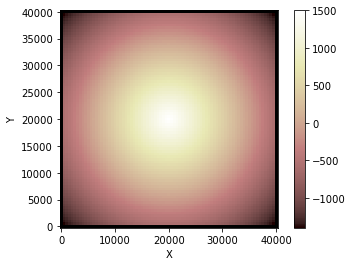

In [53]:
imshow_grid(vsim.grid, 'topographic__elevation')

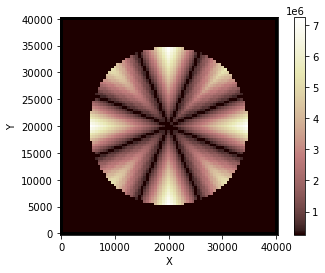

In [54]:
imshow_grid(vsim.grid, 'drainage_area')

In [55]:
vsim = VolcanicIslandSimulator(params)